In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
accidents_df = pd.read_csv(r"C:\Users\TEMP.DESKTOP-EF7B1B1.004\anaconda\Professional Projects\Datasets\road_accidents_czechia_2016_2022.csv")


In [3]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707027 entries, 0 to 707026
Data columns (total 46 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   id                                                             700689 non-null  float64
 1   communication_kind                                             700689 non-null  object 
 2   date                                                           700689 non-null  object 
 3   time                                                           700689 non-null  float64
 4   accident_kind                                                  700689 non-null  object 
 5   crash_kind                                                     700689 non-null  object 
 6   fixed_precaution_kind                                          700689 non-null  object 
 7   injury                                         

In [4]:
pd.set_option('display.max.rows', 707026)

In [5]:
accidents_df

,id,communication_kind,date,time,accident_kind,crash_kind,fixed_precaution_kind,injury,cause_of_accident,alcohol,...,way_of_releasing_persons_from_the_vehicle,direction_of_movement,damage_to_the_vehicle(in_hundred_crowns),driver_category,driver_condition,driver_external_influence,city,street,road_type,location
0,6.004418e+10,Highways,2018-01-01,1625.0,collision with forest animals,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,0.0,"forest game, domestic animals",not detected,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,800.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
1,6.004418e+10,Highways,2018-02-02,850.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,ne,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,600.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
2,6.004418e+10,Highways,2018-03-01,1959.0,collision with forest animals,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,0.0,"forest game, domestic animals",not detected,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,300.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
3,6.004418e+10,Highways,2018-04-06,2560.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,not detected,...,"undetected, driver drove off","undetected, driver drove off",0.0,"undetected, driver drove off","undetected, driver drove off","undetected, driver drove off",outside the municipality,NaN,Highways,outside the village
4,6.004418e+10,Highways,2018-04-18,2560.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,not detected,...,"undetected, driver drove off","undetected, driver drove off",0.0,"undetected, driver drove off","undetected, driver drove off","undetected, driver drove off",outside the municipality,NaN,Highways,outside the village
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707022,1.801112e+11,class 2 roads,2022-11-11,100.0,collision with a fixed obstacle,not an option It is not a collision between mo...,"wall, fixed part of bridges, underpasses, tunn...",0.0,driver of a motor vehicle,not detected,...,there was no need to use violence,vehicle moving - against the direction of stat...,500.0,NaN,NaN,NaN,Dobřeň,NaN,2nd class roads,outside the village
707023,1.801112e+11,Class 1 roads,2022-11-18,1720.0,crashes,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,1.0,driver of a motor vehicle,ne,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,500.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,Bělá Pod Bezdězem,NaN,1st class roads,outside the village
707024,1.811102e+11,3rd class roads,2022-10-24,1735.0,collision with forest animals,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,0.0,"forest game, domestic animals",not detected,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,100.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,Svijany,NaN,3rd class roads,outside the village
707025,1.902062e+11,local roads,2022-08-02,1200.0,"collision with a vehicle parked, parked",not an option It is not a col

#### Check for missing values

In [6]:
accidents_df.isnull().sum()

id                                                                 6338
communication_kind                                                 6338
date                                                               6338
time                                                               6338
accident_kind                                                      6338
crash_kind                                                         6338
fixed_precaution_kind                                              6338
injury                                                             6338
cause_of_accident                                                  6338
alcohol                                                            6784
main_cause_of_accident                                             6338
killed_persons                                                     6338
severely_injured_persons                                           6338
slightly_injured_persons                                        

#### Check for unique value

In [7]:
accidents_df.groupby('road_type')['road_type'].agg("count")

road_type
1st class roads                                              2741
2nd class roads                                              3397
3rd class roads                                              2934
Highways                                                    26205
LocalCommunications                                        278118
class 1 roads                                               99933
class 2 roads                                              108180
class 3 roads                                               92252
junction (=intersection monitored in selected cities)          94
local roads                                                  7449
monitored communication (in selected cities)                  159
node                                                        24781
purpose-built communications                                 2897
roads of the 3rd level                                         18
roadways - field and forest roads, etc.                         1


#### Replace the columns with the space

In [8]:
#1st 2nd class roads
accidents_df["road_type"] = accidents_df["road_type"].str.replace("class 1 roads", "1st class roads")
accidents_df["road_type"] = accidents_df["road_type"].str.replace("class 2 roads", "2nd class roads")

#3rd class roads
accidents_df["road_type"] = accidents_df["road_type"].str.replace("class 3 roads", "3rd class roads")
accidents_df["road_type"] = accidents_df["road_type"].str.replace("roads of the 3rd level", "3rd class roads")

#Highways
accidents_df["road_type"] = accidents_df["road_type"].str.replace("junction (=intersection monitored in selected cities)", "Highways")
accidents_df["road_type"] = accidents_df["road_type"].str.replace("monitored communication (in selected cities)", "Highways")

#special purpose roads
accidents_df["road_type"] = accidents_df["road_type"].str.replace("special-purpose roads - other (parking lots, rest areas", "special purpose roads")
accidents_df["road_type"] = accidents_df["road_type"].str.replace("special purpose roads - field and forest roads, etc.", "special purpose roads")
accidents_df["road_type"] = accidents_df["road_type"].str.replace("roadways - field and forest roads, etc.", "special purpose roads")

#locals
accidents_df["road_type"] = accidents_df["road_type"].str.replace("LocalCommunications", "locals")
accidents_df["road_type"] = accidents_df["road_type"].str.replace("local roads", "locals")

#others
accidents_df["road_type"] = accidents_df["road_type"].str.replace("sledovanacommunications", "others")
accidents_df["road_type"] = accidents_df["road_type"].str.replace("node", "others")
accidents_df["road_type"] = accidents_df["road_type"].str.replace("purpose-built communications", "others")
accidents_df["road_type"] = accidents_df["road_type"].str.replace("utility communication - other (parking, rest", "others")

accidents_df['road_type'].unique()

array(['Highways', 'locals', '3rd class roads', '1st class roads',
       '2nd class roads', nan, 'others', 'special purpose roads'],
      dtype=object)

#### Total Number of Accidents

In [9]:
accidents_df['date'] = pd.to_datetime(accidents_df['date'])

start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2022-12-31')
filtered_df = accidents_df[(accidents_df['date'] >= start_date) & (accidents_df['date'] <= end_date)]

total_accidents = len(filtered_df)

print("Total:", total_accidents)

Total: 700689


## Q1:  What trend did the number of road accicents follow during the specified period?

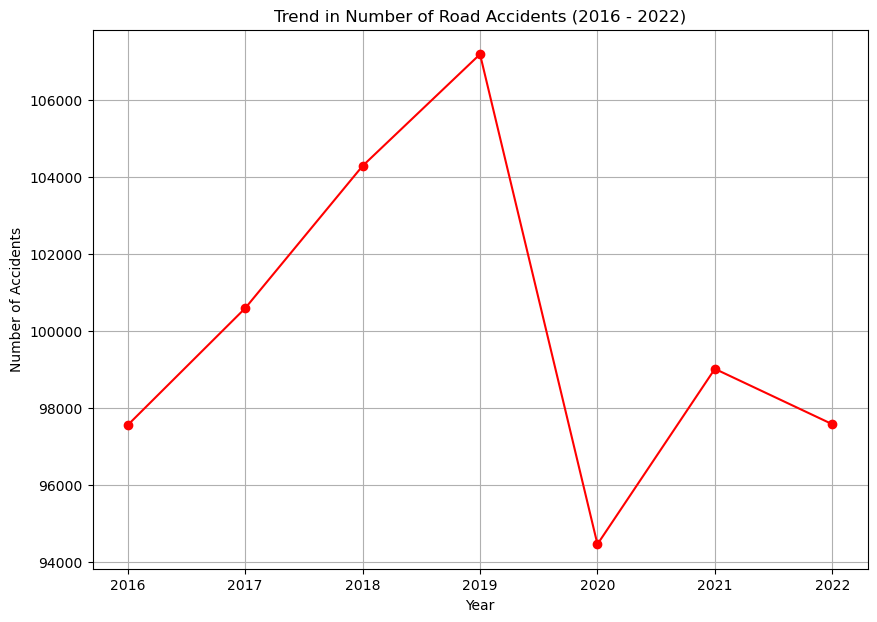

In [10]:
accidents_df['date'] = pd.to_datetime(accidents_df['date'])

start_date = '2016-01-01'
end_date = '2022-12-31'
filtered_df = accidents_df[(accidents_df['date'] >= start_date) & (accidents_df['date'] <= end_date)]

accidents_by_year = filtered_df.groupby(filtered_df['date'].dt.year).size()

plt.figure(figsize = (10, 7))
accidents_by_year.plot.line(marker = 'o', color = 'r')
plt.title('Trend in Number of Road Accidents (2016 - 2022)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

## Q2:

In [18]:
# convert date column to datetime format
accidents_df['date'] = pd.to_datetime(accidents_df['date'])

# Extract months from the date column
accidents_df['Month'] = accidents_df['date'].dt.month

# Group by months with num of accidents count
accidents_by_month = accidents_df.groupby('date').size()

print(accidents_by_month)

date
2016-01-01    447
2016-01-02    148
2016-01-03     99
2016-01-04    343
2016-01-05    269
2016-01-06    274
2016-01-07    207
2016-01-08    323
2016-01-09    210
2016-01-10    139
2016-01-11    256
2016-01-12    284
2016-01-13    354
2016-01-14    265
2016-01-15    334
2016-01-16    227
2016-01-17    218
2016-01-18    273
2016-01-19    240
2016-01-20    292
2016-01-21    297
2016-01-22    324
2016-01-23    315
2016-01-24    158
2016-01-25    272
2016-01-26    291
2016-01-27    255
2016-01-28    225
2016-01-29    282
2016-01-30    190
2016-01-31    145
2016-02-01    243
2016-02-02    205
2016-02-03    204
2016-02-04    257
2016-02-05    275
2016-02-06    186
2016-02-07    137
2016-02-08    241
2016-02-09    246
2016-02-10    246
2016-02-11    215
2016-02-12    264
2016-02-13    180
2016-02-14    139
2016-02-15    226
2016-02-16    237
2016-02-17    392
2016-02-18    252
2016-02-19    262
2016-02-20    174
2016-02-21    169
2016-02-22    248
2016-02-23    269
2016-02-24    268
2016-

## Q3:

In [139]:
accidents_by_city = accidents_df.groupby('city').size()

total_accidents = accidents_by_city.sum()
accident_rates = (accidents_by_city / total_accidents) * 100

highest_accidents_rate_city = accident_rates.idxmax()
highest_accidents_rate = accident_rates.max()

lowest_accident_rate_city = accident_rates.idxmin()
lowest_accident_rate = accident_rates.min()

print("City with highest accident rate:", highest_accidents_rate_city)
print("Highest accident rate:", highest_accidents_rate)
print("City with the lowestest accident rate:", lowest_accident_rate_city)
print("Lowest accident rate:", lowest_accident_rate)

City with highest accident rate: outside the municipality
Highest accident rate: 32.48489803076827
City with the lowestest accident rate: 10-Uhříněves
Lowest accident rate: 0.00014143731427512668


## Q4: The Most Common Type of Road Accident and Number of Occurances

In [140]:
most_common_accident_type = accidents_df['accident_kind'].value_counts().idxmax()
most_common_accident_type_count = accidents_df['accident_kind'].value_counts().max()

print("The Most Common Type of Road Accident is:->", most_common_accident_type)
print("Number of Occurances:->", most_common_accident_type_count)

The Most Common Type of Road Accident is:-> collision with a moving non-rail vehicle
Number of Occurances:-> 224165


## Q5:  Accidents by Road Type

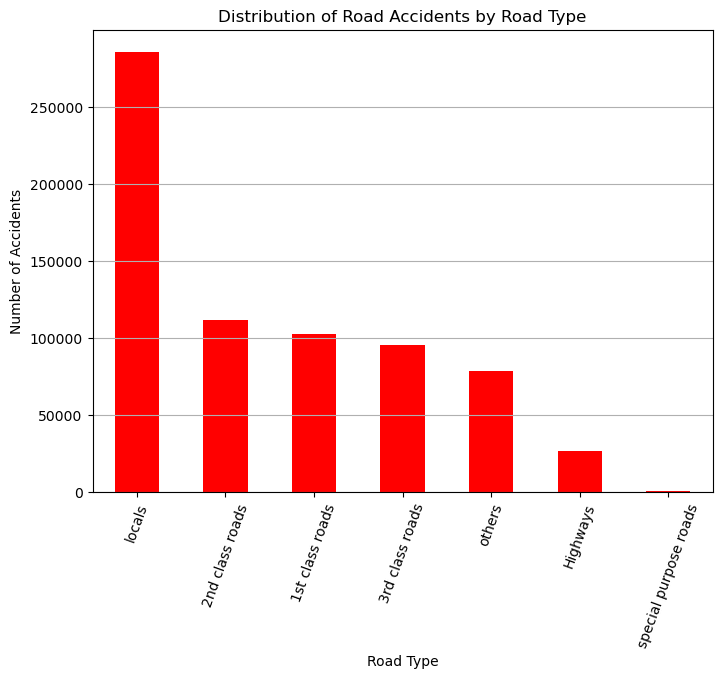

In [174]:
road_type_distribution = accidents_df['road_type'].value_counts()

plt.figure(figsize = (8, 6))
road_type_distribution.plot.bar(color = 'r')
plt.title('Distribution of Road Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation = 70)
plt.grid(axis = 'y')
plt.show()

## Q6: Number of Road Accidents by Weather Condition and Visibility

C:\Users\TEMP.DESKTOP-EF7B1B1.004\AppData\Local\Temp\ipykernel_5172\66588192.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


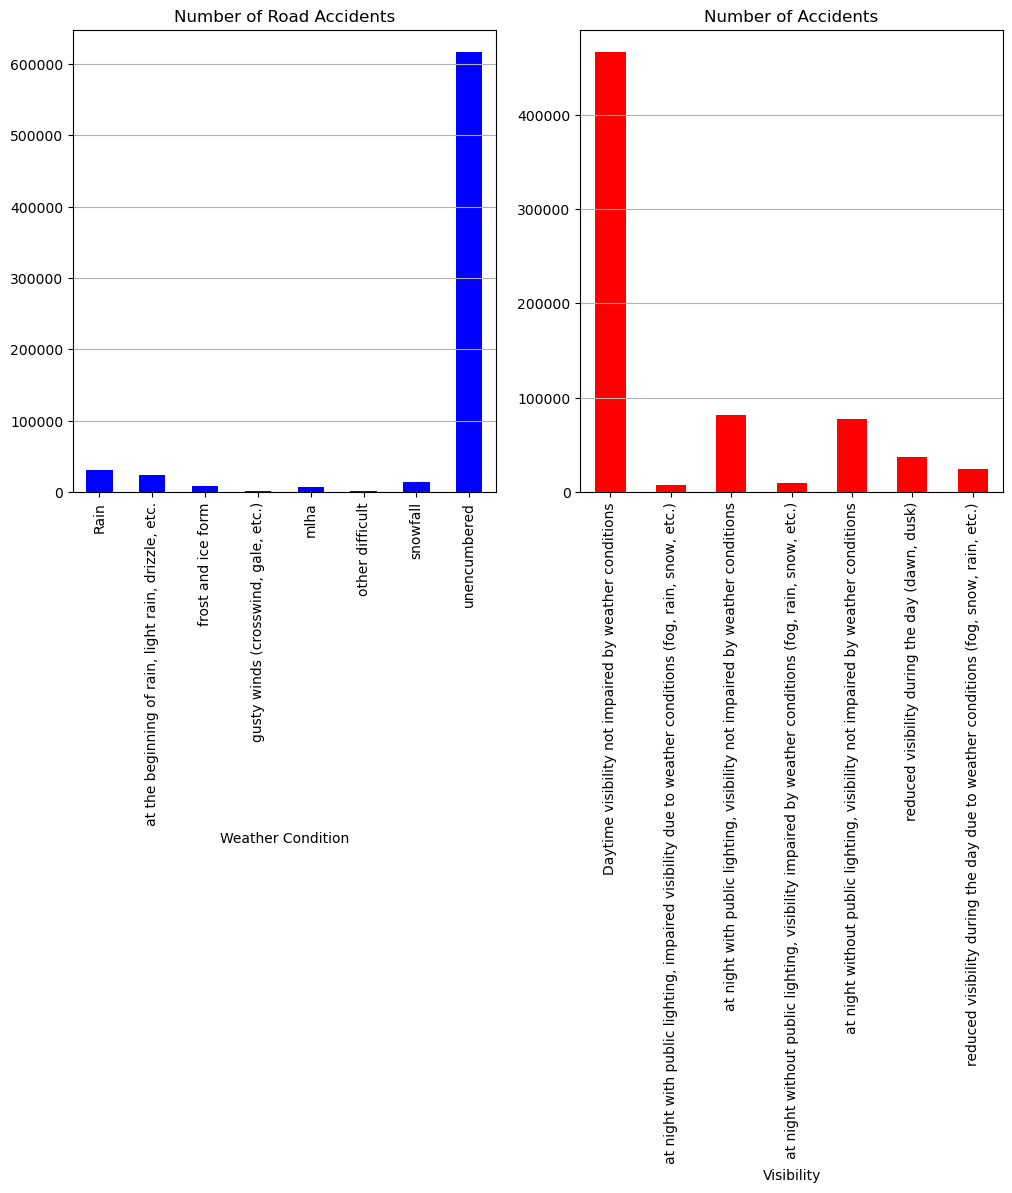

In [180]:
accidents_by_weather = accidents_df.groupby ('weather_conditions_at_the_time_of_accident').size()

#Group by visibility
accidents_by_visibility = accidents_df.groupby ('visibility').size()

#Plot the data
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

#Plot for weather conditions
accidents_by_weather.plot.bar(ax = axes[0], color = 'b')
axes[0].set_title('Number of Road Accidents by Weather Condition')
axes[0].set_xlabel('Weather Condition')
axes[0].set_title('Number of Road Accidents')
axes[0].grid(axis = 'y')

#Plot for visibilty
accidents_by_visibility.plot.bar(ax = axes[1], color = 'r')
axes[1].set_title('Number of Road Accidents by Visibility')
axes[1].set_xlabel('Visibility')
axes[1].set_title('Number of Accidents')
axes[1].grid(axis = 'y')

plt.tight_layout()
plt.show()

## Q7: Number of Accidents by Vehicle Brand

In [187]:
accidents_by_brand = accidents_df['vehicle_brand'].value_counts()

print('Number of Accidents by Vehicle Brand:')
print(accidents_by_brand)

Number of Accidents by Vehicle Brand:
vehicle_brand
Škoda                                     145336
Undetected, Driver Drove Off              122674
Volkswagen                                 54880
Ford                                       37084
Renault                                    27773
Mercedes                                   26746
Peugeot                                    25956
Bmw Motorcycles                            17575
Hyundai                                    17039
Citroen                                    16739
Opel                                       16225
Fiat                                       14294
Audi                                       14038
Iveco                                      11951
Others Made Outside The Czech Republic     10987
Volvo                                      10531
Toyota                                     10452
Man                                         8157
Kia                                         7785
Honda            

## Q8: Total Number of Deaths by Year Accidents (2016 - 2022)

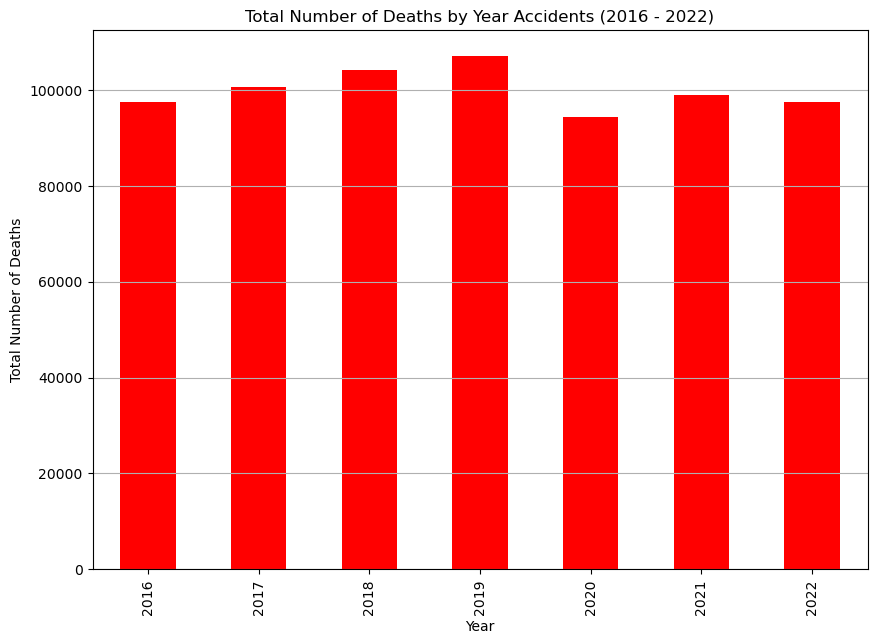

In [199]:
accidents_df['date'] = pd.to_datetime(accidents_df['date'])

start_date = '2016-01-01'
end_date = '2022-12-31'
filtered_df = accidents_df[(accidents_df['date'] >= start_date) & (accidents_df['date'] <= end_date)]

deaths_by_year = filtered_df.groupby(filtered_df['date'].dt.year)['killed_persons'].sum()

plt.figure(figsize = (10, 7))
accidents_by_year.plot.bar(color = 'r')
plt.title('Total Number of Deaths by Year Accidents (2016 - 2022)')
plt.xlabel('Year')
plt.ylabel('Total Number of Deaths')
plt.grid(axis = 'y')
plt.show()